# Transfer Functions

The preparatory reading for this section is [Chapter 4.4](https://ebookcentral.proquest.com/lib/swansea-ebooks/reader.action?docID=3384197&ppg=75#ppg=113) {cite}`karris` which discusses transfer function models of electrical circuits.

## Colophon


An annotatable worksheet for this presentation is available as [**Worksheet 7**](https://cpjobling.github.io/eg-247-textbook/laplace_transform/4/worksheet7.html).

* The source code for this page is [laplace_transform/4/transfer_functions.ipynb](https://github.com/cpjobling/eg-247-textbook/blob/master/laplace_transform/4/transfer_functions.ipynb).

* You can view the notes for this presentation as a webpage ([HTML](https://cpjobling.github.io/eg-247-textbook/laplace_transform/4/transfer_functions.html)). 

* This page is downloadable as a [PDF](https://cpjobling.github.io/eg-247-textbook/laplace_transform/4/transfer_functions.pdf) file.

## Agenda

* Transfer Functions

* A Couple of Examples

* Circuit Analysis Using MATLAB LTI Transfer Function Block

* Circuit Simulation Using Simulink Transfer Function Block

In [1]:
% Matlab setup
clear all
cd ../matlab 
pwd
format compact

ans =
    '/Users/eechris/code/src/github.com/cpjobling/eg-150-textbook/laplace_transform/matlab'


## Transfer Functions for Circuits

When doing circuit analysis with components defined in the complex frequency domain, the ratio of the output voltage $V_{\mathrm{out}}(s)$ to the input voltage $V_{\mathrm{in}}(s)$ *under zero initial conditions* is of great interest.

This ratio is known as the *voltage transfer function* denoted $G_v(s)$:

$$G_v(s) = \frac{V_{\mathrm{out}}(s)}{V_{\mathrm{in}}(s)}$$

Similarly, the ratio of the output current $I_{\mathrm{out}}(s)$ to the input current $I_{\mathrm{in}}(s)$ *under zero initial conditions*, is called the *cuurent transfer function* denoted $G_i(s)$:

$$G_i(s) = \frac{I_{\mathrm{out}}(s)}{I_{\mathrm{in}}(s)}$$

In practice, the current transfer function is rarely used, so we will use the voltage transfer function denoted:

$$G(s) = \frac{V_{\mathrm{out}}(s)}{V_{\mathrm{in}}(s)}$$

## Examples

See [Worksheet 7](worksheet7) for the worked solutions to the examples. We will work through these in class. Here I'll demonstrate the MATLAB solutions.

### Example 6

Derive an expression for the transfer function $G(s)$ for the circuit below. In this circuit $R_g$ represents the internal resistance of the applied (voltage) source $v_s$, and $R_L$ represents the resistance of the load that consists of $R_L$, $L$ and $C$.

<img title="Circuit for Example 6" src="pictures/example6.png" width="50%" />

### Sketch of Solution

* Replace $v_s(t)$, $R_g$, $R_L$, $L$ and $C$ by their transformed (*complex frequency*) equivalents: $V_s(s)$, $R_g$, $R_L$, $sL$ and $1/(sC)$

* Use the *Voltage Divider Rule* to determine $V_\mathrm{out}(s)$ as a function of $V_s(s)$

* Form $G(s)$ by writing down the ratio $V_\mathrm{out}(s)/V_s(s)$

### Worked solution.

Pencast: [ex6.pdf](https://cpjobling.github.io/eg-247-textbook/laplace_transform/worked_examples/ex6.pdf) - open in Adobe Acrobat Reader.

### Answer

$$G(s) = \frac{V_\mathrm{out}(s)}{V_s(s)} = \frac{R_L + sL + 1/sC}{R_g + R_L + sL + 1/sC}.$$

### Example 7

Compute the transfer function for the op-amp circuit shown below in terms of the circuit constants $R_1$, $R_2$, $R_3$, $C_1$ and $C_2$.

<img alt="Circuit for Example 7" src="pictures/example7.png" width="50%" />

Then replace the complex variable $s$ with $j\omega$, and the circuit constants with their numerical values and plot the magnitude

$$\left|G(j\omega)\right| = \frac{\left|V_{\mathrm{out}}(j\omega)\right|}{\left|V_{\mathrm{in}}(j\omega)\right|}$$

versus radian frequency $\omega$ rad/s.

### Sketch of Solution

* Replace the components and voltages in the circuit diagram with their complex frequency equivalents

* Use nodal analysis to determine the voltages at the nodes either side of the 50K resistor $R_3$

* Note that the voltage at the input to the op-amp is a virtual ground

* Solve for $V_{\mathrm{out}}(s)$ as a function of $V_{\mathrm{in}}(s)$

* Form the reciprocal $G(s) = V_{\mathrm{out}}(s)/V_{\mathrm{in}}(s)$

* Use MATLAB to calculate the component values, then replace $s$ by $j\omega$.

* Plot on log-linear "paper":

$$\left|G(j\omega)\right|$$

### Worked solution.

Pencast: [ex7.pdf](https://cpjobling.github.io/eg-247-textbook/laplace_transform/worked_examples/ex7.pdf) - open in Adobe Acrobat Reader.

### Answer

$$G(s) = \frac{V_\mathrm{out}(s)}{V_\mathrm{in}(s)} = \frac{-1}{R_1\left(\left(1/R_1 + 1/R_2 + 1/R_3 + sC_1\right)\left(sC_2R_3\right)+1/R_2\right)}.$$

### The Matlab Bit

See attached script: [solution7.m](https://cpjobling.github.io/eg-247-textbook/laplace_transform/matlab/solution7.m).

#### Week 3: Solution 7

In [2]:
syms s;

In [3]:
R1 = 200*10^3; 
R2 = 40*10^3;
R3 = 50*10^3;

C1 = 25*10^(-9);
C2 = 10*10^(-9);

In [4]:
den = R1*((1/R1+ 1/R2 + 1/R3 + s*C1)*(s*R3*C2) + 1/R2);
simplify(den)

ans =


100*s*(2.5000e-08*s + 5.0000e-05) + 5


Simplify coefficients of s in denominator

In [5]:
format long
denG = sym2poly(ans)

denG =
   0.000002500000000   0.005000000000000   5.000000000000000


In [6]:
numG = -1;

Plot

For convenience, define coefficients $a$ and $b$:

In [7]:
a = denG(1);
b = denG(2);

$$G(j\omega) = \frac{-1}{a\omega^2 - jb\omega + 5}$$

In [8]:
w = 1:10:10000;
Gs = -1./(a*w.^2 - j.*b.*w + denG(3));

Plot

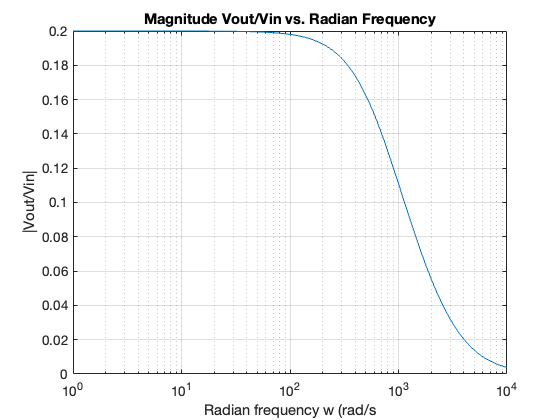

In [9]:
semilogx(w, abs(Gs))
xlabel('Radian frequency w (rad/s')
ylabel('|Vout/Vin|')
title('Magnitude Vout/Vin vs. Radian Frequency')
grid

## Using Transfer Functions in MATLAB for System Analysis

Please use the file [tf_matlab.m](https://cpjobling.github.io/eg-247-textbook/laplace_transform/matlab/tf_matlab.m) to explore the Transfer Function features provide by MATLAB. Open the file as a Live Script to see a nicely formatted document.

## Using Transfer Functions in Simulink for System Simulation

![Using Transfer Functions in Simulink for System Simulation](pictures/sim_tf.png)

The Simulink transfer function (**`Transfer Fcn`**) block implements a transfer function

The transfer function block represents a general input output function

$$G(s) = \frac{N(s)}{D(s)}$$

and is not specific nor restricted to circuit analysis.

It can, however be used in modelling and simulation studies.

### Example

Recast Example 7 as a MATLAB problem using the LTI Transfer Function block. 

For simplicity use parameters $R_1 = R_2 = R_3 = 1\; \Omega$, and $C_1 = C_2 = 1$ F.

Calculate the step response using the LTI functions.

Verify the result with Simulink.

The Matlab solution: [example8.m](https://cpjobling.github.io/eg-247-textbook/laplace_transform/matlab/example8.m)

#### MATLAB Solution
From a previous analysis the transfer function is:

$$G(s) = \frac{V_\mathrm{out}}{V_\mathrm{in}} = \frac{-1}{R_1\left[(1/R_1 + 1/R_2 + 1/R_3 + sC_1)(sR_3C_2) + 1/R_2\right]}$$

so substituting the component values we get:

$$G(s) = \frac{V_{\mathrm{out}}}{V_{\mathrm{in}}} = \frac{-1}{s^2 + 3s + 1}$$

We can find the step response by letting $v_{\mathrm{in}}(t) = u_0(t)$ so that
$V_{\mathrm{in}}(s)=1/s$ then 

$$V_{\mathrm{out}}(s) = \frac{-1}{s^2 + 3s + 1}.\frac{1}{s}$$

We can solve this by partial fraction expansion and inverse Laplace transform
as is done in the text book with the help of MATLAB's `residue` function.

Here, however we'll use the LTI block.

Define the circuit as a transfer function

In [10]:
G = tf([-1],[1 3 1])


G =


       -1


  -------------


  s^2 + 3 s + 1


Continuous-time transfer function.



step response is then:

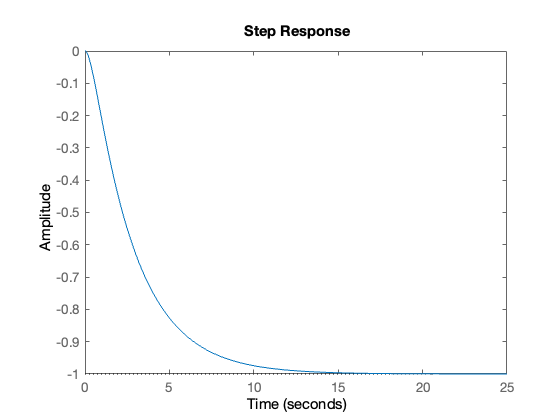

In [11]:
step(G)

Simples!

#### Simulink model

See [example_8.slx](https://cpjobling.github.io/eg-247-textbook/laplace_transform/matlab/example_8.slx)

In [12]:
open example_8

![Simulink model](pictures/ex8_sim.png)

Result

![Simulation result](pictures/ex8_sim_result.png)

Let's go a bit further by finding the frequency response:

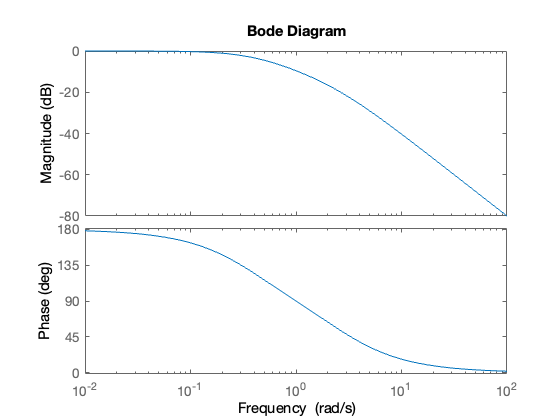

In [13]:
bode(G)

## Reference 

See [Bibliography](/zbib).